# Solutions — Week 1: Image Basics (NumPy Only)

Reference solutions for the Week 1 Computer Vision assignment.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


Image shape: (3438, 5157, 3)
Min pixel value: 0
Max pixel value: 255


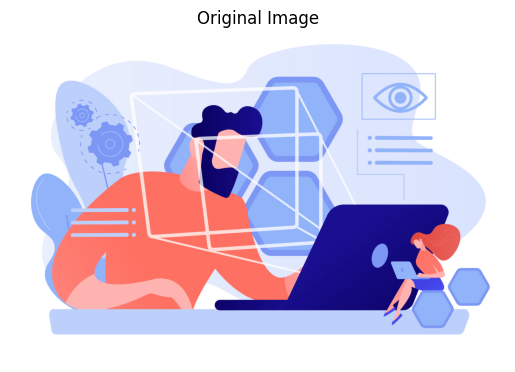

In [2]:
img = mpimg.imread("image.jpg")  # change path if needed

print("Image shape:", img.shape)
print("Min pixel value:", img.min())
print("Max pixel value:", img.max())

plt.imshow(img)
plt.axis("off")
plt.title("Original Image")
plt.show()


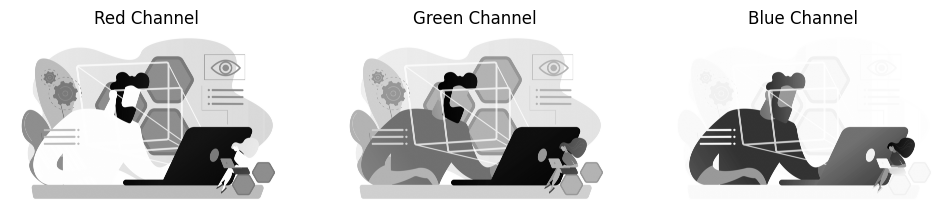

In [3]:
R = img[:, :, 0]
G = img[:, :, 1]
B = img[:, :, 2]

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(R, cmap="gray")
plt.title("Red Channel")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(G, cmap="gray")
plt.title("Green Channel")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(B, cmap="gray")
plt.title("Blue Channel")
plt.axis("off")

plt.show()


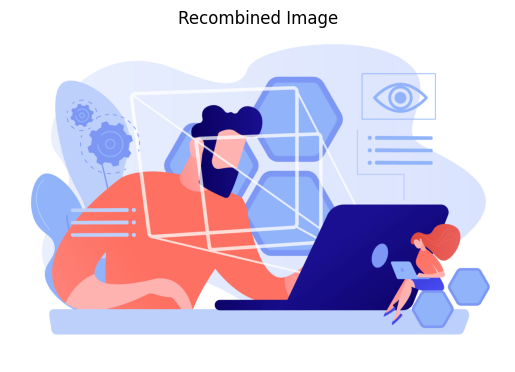

In [4]:
recombined = np.stack([R, G, B], axis=-1)

plt.imshow(recombined)
plt.axis("off")
plt.title("Recombined Image")
plt.show()


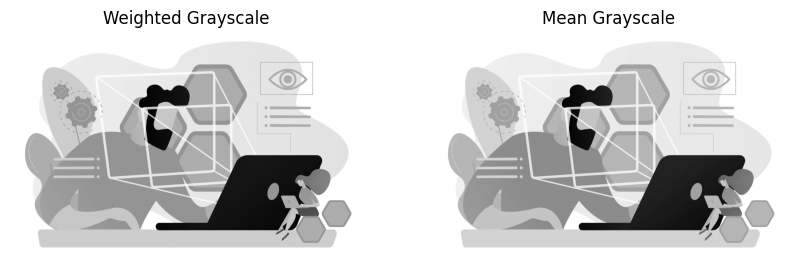

In [5]:
gray_weighted = 0.299 * R + 0.587 * G + 0.114 * B
gray_mean = np.mean(img, axis=2)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(gray_weighted, cmap="gray")
plt.title("Weighted Grayscale")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(gray_mean, cmap="gray")
plt.title("Mean Grayscale")
plt.axis("off")

plt.show()


In [6]:
img_artificial = np.array([
    [[1, 0, 0], [0, 1, 0], [0, 0, 1]],
    [[1, 1, 0], [0, 1, 1], [1, 0, 1]],
    [[0.5, 0.5, 0.5], [1, 1, 1], [0, 0, 0]]
])

for i in range(3):
    for j in range(3):
        print(f"Pixel ({i},{j}) RGB:", img_artificial[i, j])


Pixel (0,0) RGB: [1. 0. 0.]
Pixel (0,1) RGB: [0. 1. 0.]
Pixel (0,2) RGB: [0. 0. 1.]
Pixel (1,0) RGB: [1. 1. 0.]
Pixel (1,1) RGB: [0. 1. 1.]
Pixel (1,2) RGB: [1. 0. 1.]
Pixel (2,0) RGB: [0.5 0.5 0.5]
Pixel (2,1) RGB: [1. 1. 1.]
Pixel (2,2) RGB: [0. 0. 0.]


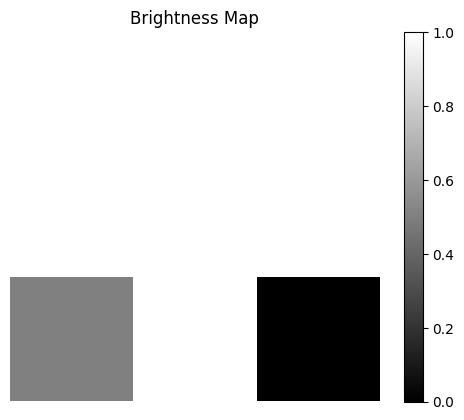

In [7]:
def brightness(img):
    return np.max(img, axis=2)

bright_map = brightness(img_artificial)

plt.imshow(bright_map, cmap="gray")
plt.colorbar()
plt.title("Brightness Map")
plt.axis("off")
plt.show()


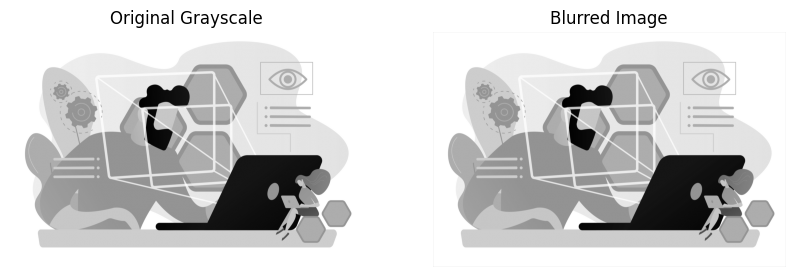

In [8]:
def blur_gray(img):
    kernel = np.ones((3, 3)) / 9
    padded = np.pad(img, 1)
    H, W = img.shape
    output = np.zeros_like(img)

    for i in range(H):
        for j in range(W):
            region = padded[i:i+3, j:j+3]
            output[i, j] = np.sum(region * kernel)

    return output

blurred = blur_gray(gray_weighted)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(gray_weighted, cmap="gray")
plt.title("Original Grayscale")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(blurred, cmap="gray")
plt.title("Blurred Image")
plt.axis("off")

plt.show()


## Reflection

- A convolution kernel defines how neighboring pixels influence a pixel.
- Changing the kernel changes the type of feature extracted.
- Weighted grayscale better matches human visual perception.
